In [1]:
# library imports
import os
import warnings
from itertools import product
from dateutil.relativedelta import relativedelta    # working with dates in style

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.formula.api as smf       # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels as sm

from scipy.optimize import minimize
import scipy.stats as stats

from tqdm import tqdm_notebook

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
sns.set_palette('Set2')
sns.set_style('whitegrid')

In [3]:
ads = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/ads.csv', 
                  index_col=['Time'], parse_dates=['Time'])
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [4]:
currency = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/currency.csv', 
                 index_col=['Time'], parse_dates=['Time'])
currency.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


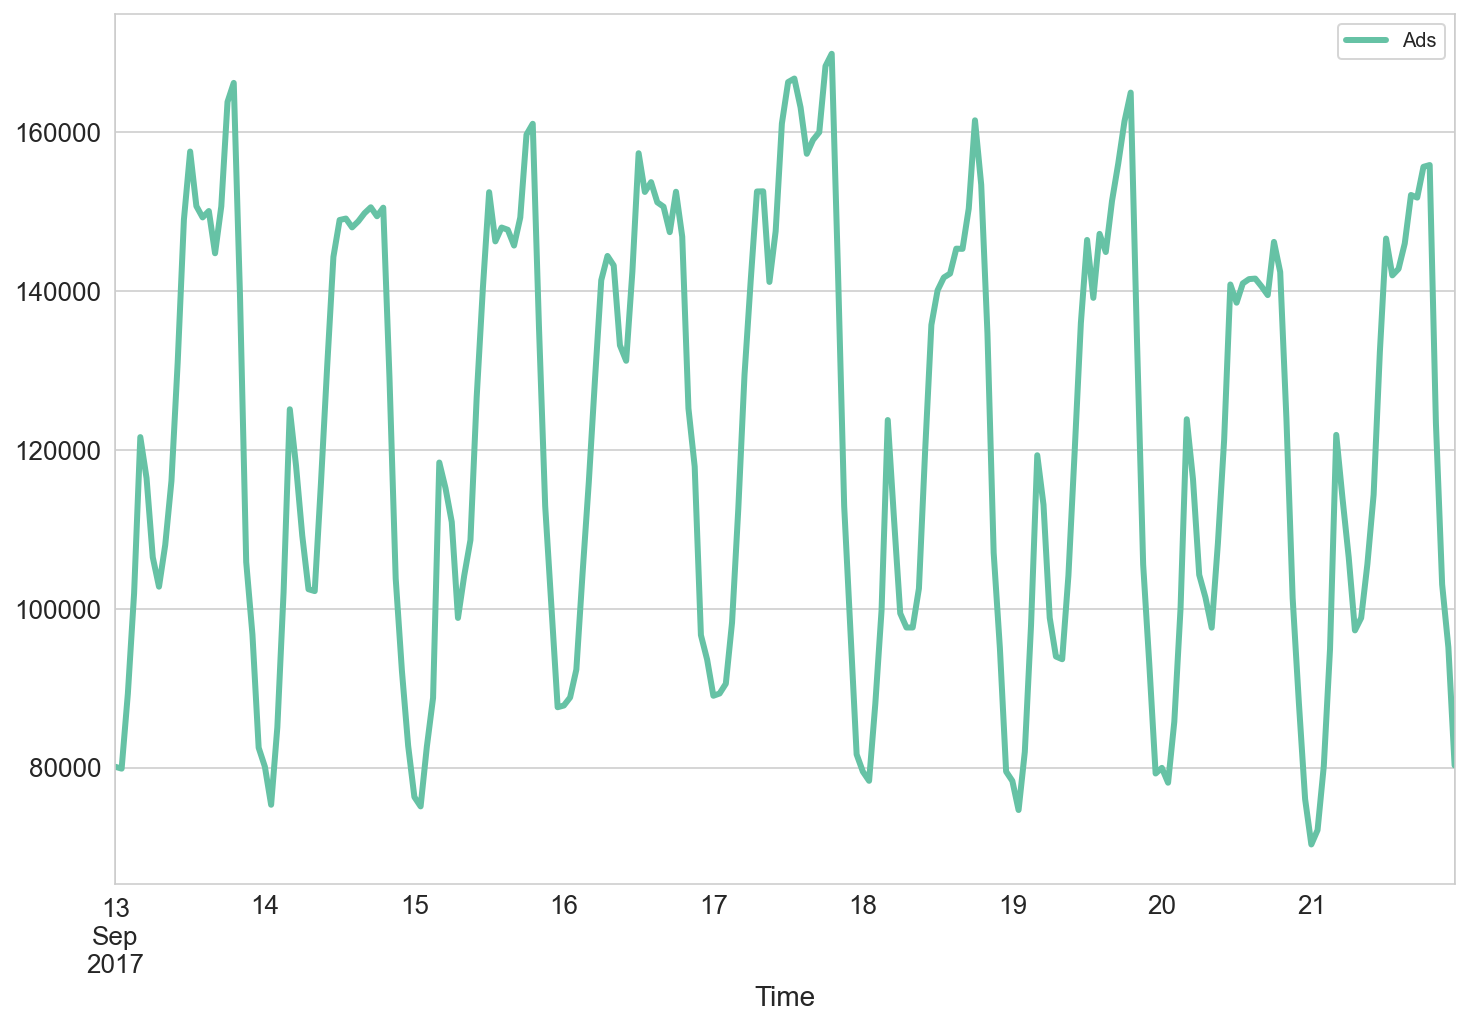

In [5]:
ads.plot();

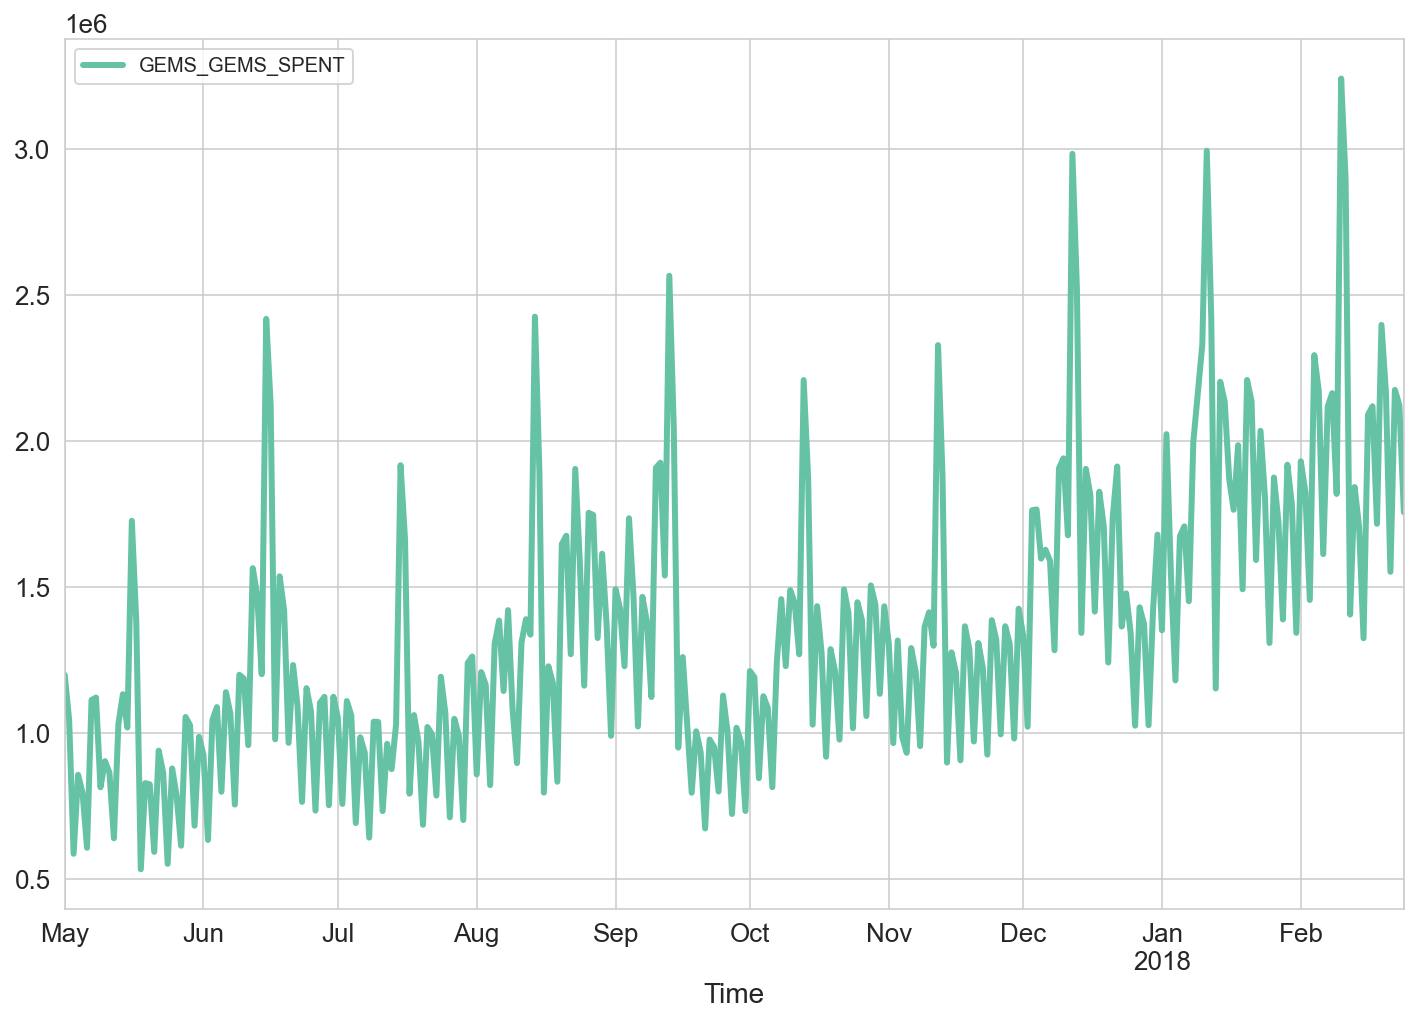

In [6]:
currency.plot();

In [7]:
from sklearn import metrics

In [8]:
# define some utility functions
def mean_absolute_percent_error(y_true: np.array, y_pred: np.array):
    return np.mean((np.abs(y_true - y_pred) / y_true) * 100)

def moving_average(series: pd.Series, n):
    return np.average(series[-n:])

In [9]:
print(moving_average(ads, 24))
print(ads.rolling(window=24).mean().iloc[-1])

116805.0
Ads    116805.0
Name: 2017-09-21 23:00:00, dtype: float64


In [10]:
def plot_moving_average(series, window, plot_interval=False, scale=1.96, plot_anomalies=False):
    """
    series: dataframe with timeseries
    window: rolling window size
    plot_interval: show confidence intervals
    plot_anomalies: show anomalies
    """
    rolling_mean = series.rolling(window=window).mean()
    plt.title(f'Moving average\n window size: {window}')
    plt.plot(rolling_mean, label='rolling mean trend')
    
    # plot confidence intervals
    if plot_interval:
        mae = metrics.mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.fill_between(series.index, y1=lower_bound.values.ravel(), y2=upper_bound.values.ravel(), 
        alpha=0.2)

        # plot anomalies
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "o", markersize=10)
    plt.plot(series[window:], label='actual values')
    plt.legend()

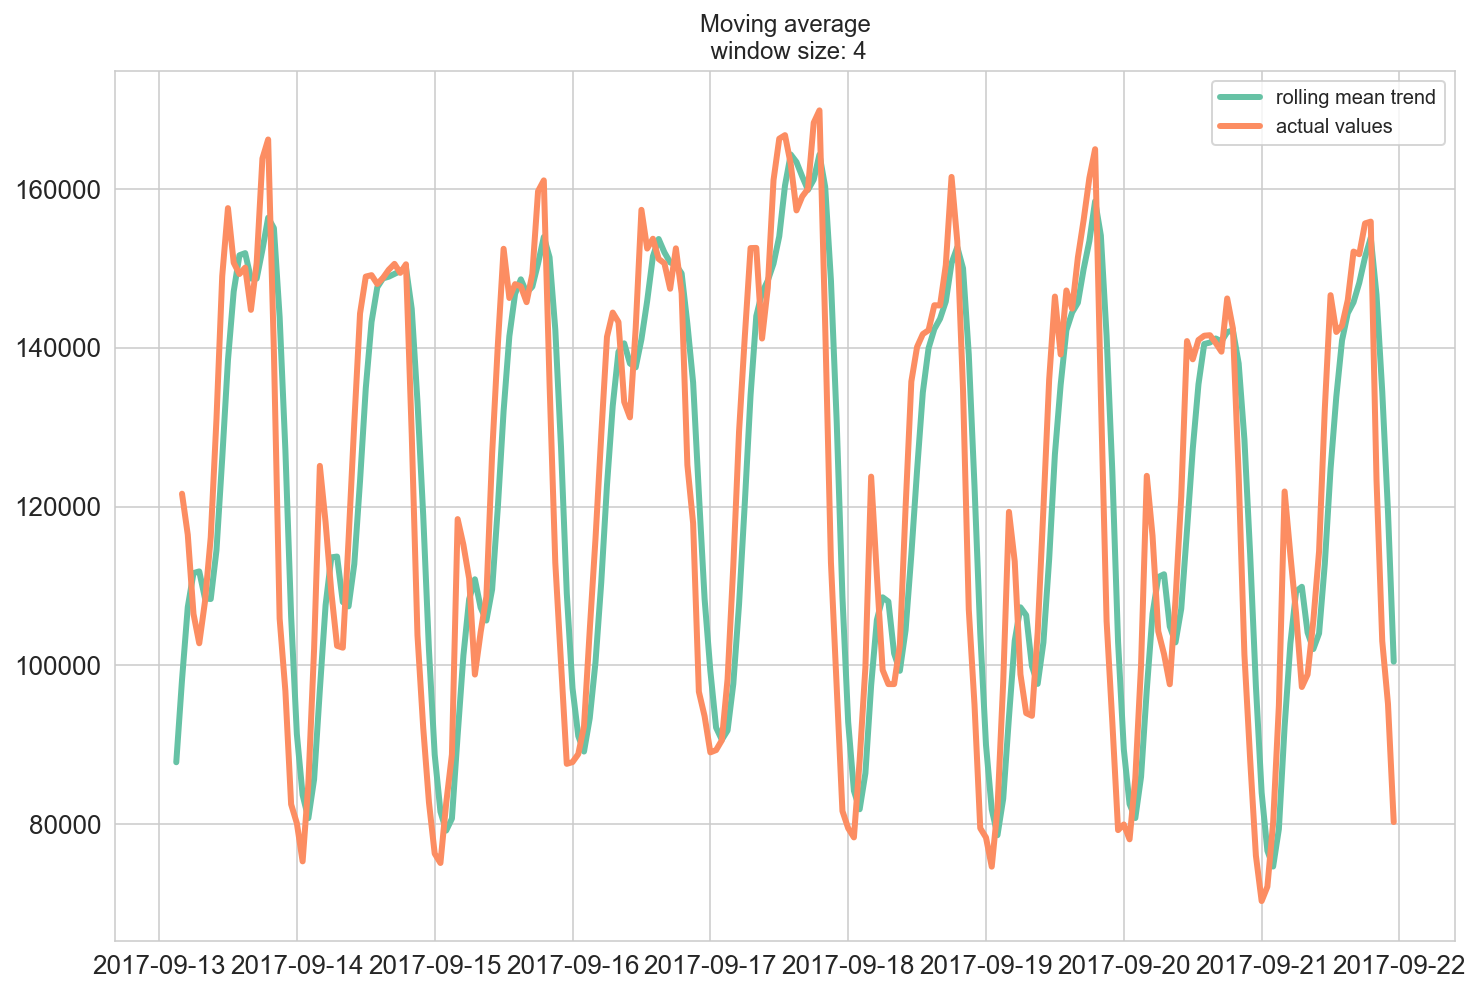

In [11]:
plot_moving_average(ads, 4)

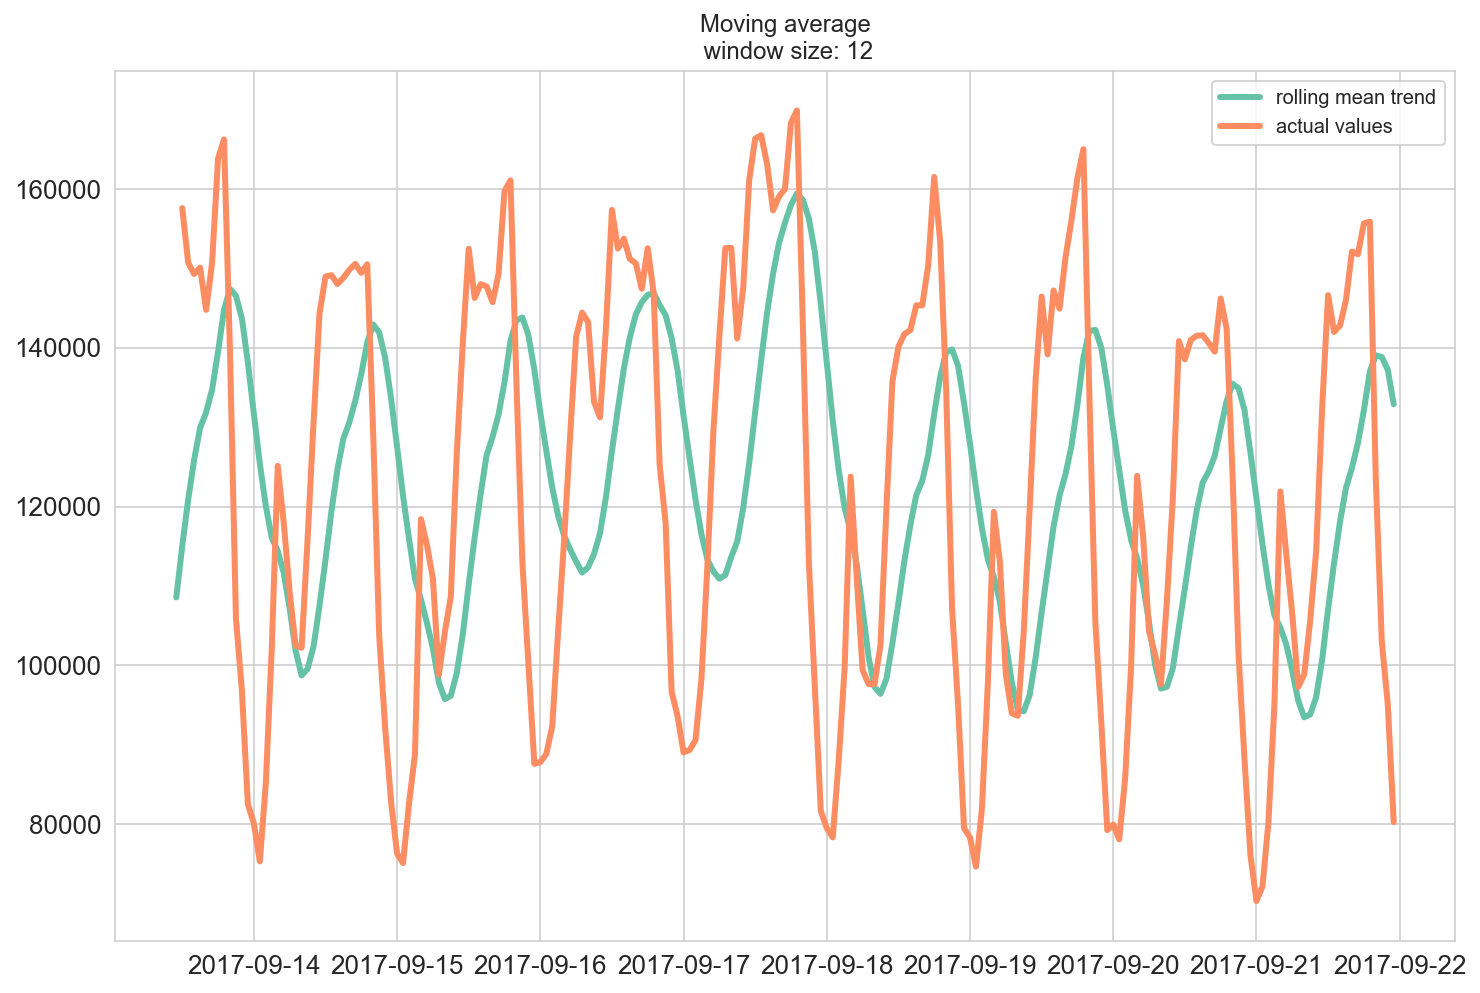

In [12]:
plot_moving_average(ads, 12)

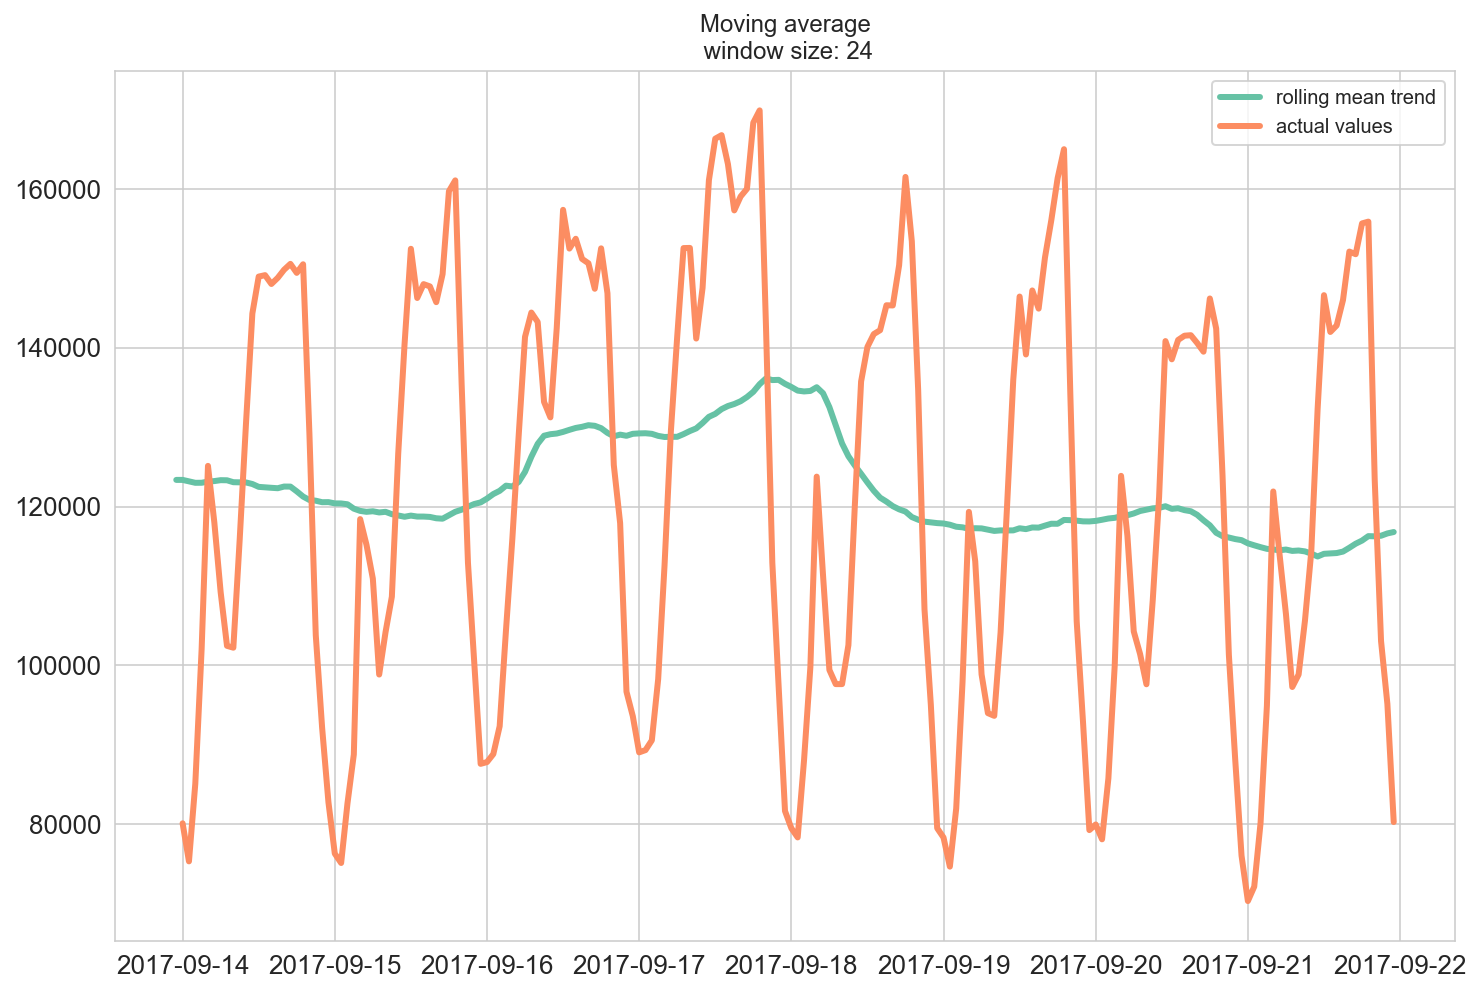

In [13]:
plot_moving_average(ads, 24)

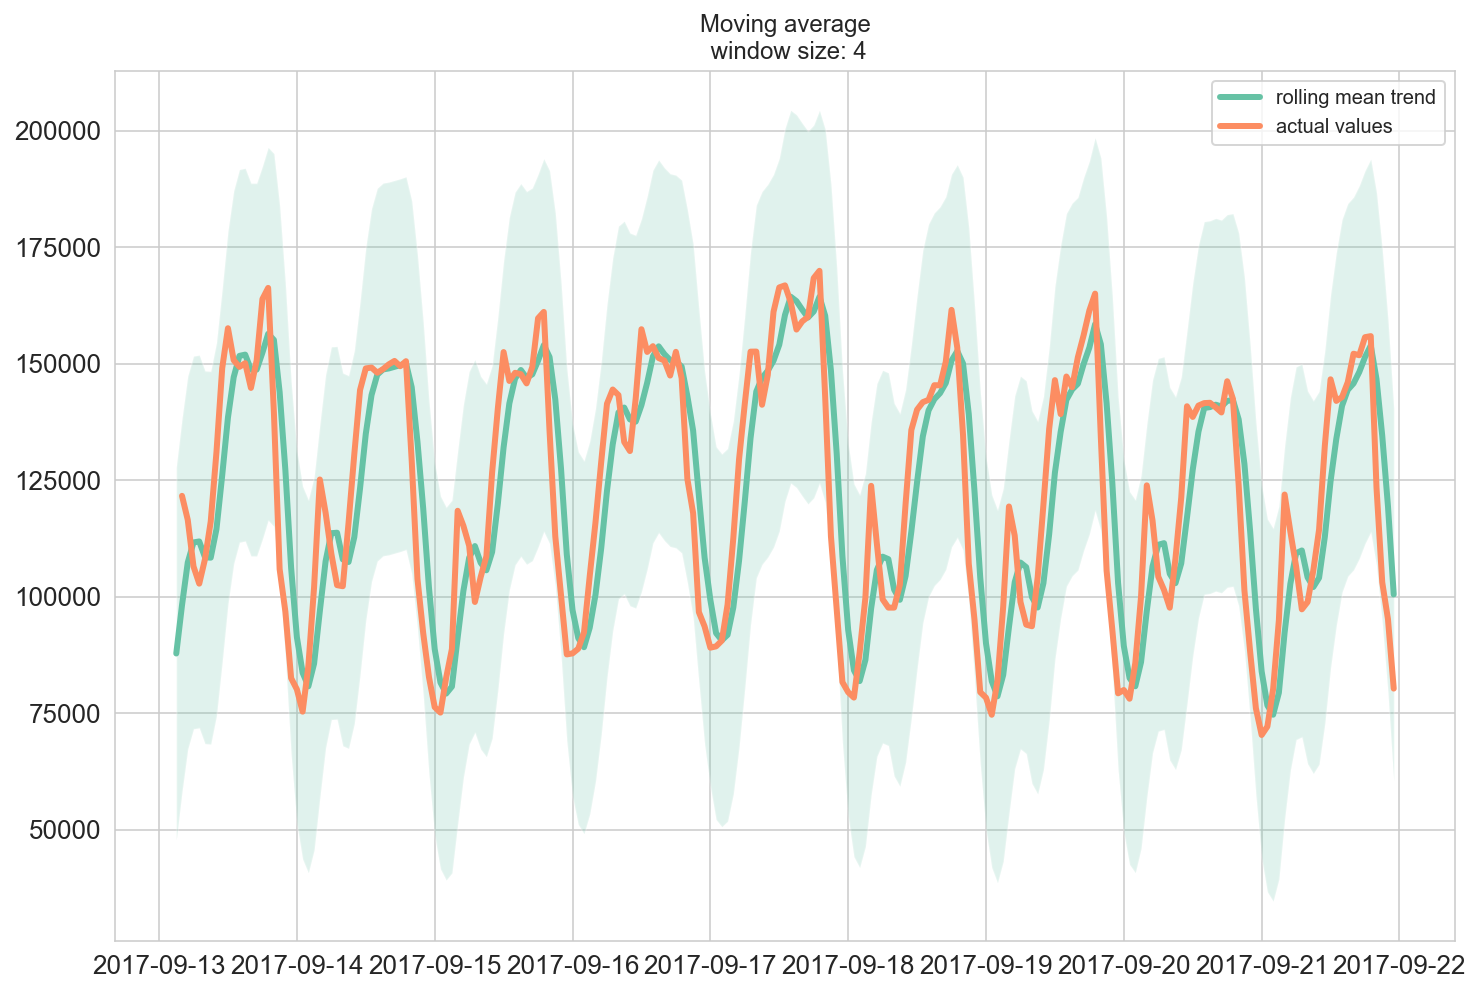

In [14]:
plot_moving_average(ads, 4, plot_interval=True);